In [17]:
import csv

with open('/content/BNBFDUSD_20250317(1).txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('log.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('title', 'intro'))
        writer.writerows(lines)

In [ ]:
df = pd.read_csv('/content/log.csv')

In [19]:
df

,,,,title,intro
Time,Price,Quantity,IsMarketMaker,NumTrades,M
2025-03-17 00:00:04.943335783 +0530 IST,605.94000000,0.89000000,false,1,true
2025-03-17 00:00:04.945244303 +0530 IST,605.94000000,0.14900000,false,1,true
2025-03-17 00:00:04.952959268 +0530 IST,605.95000000,0.01300000,false,1,true
2025-03-17 00:00:09.096707644 +0530 IST,605.93000000,0.41700000,false,1,true
...,...,...,...,...,...
2025-03-17 07:23:23.869205844 +0530 IST,618.01000000,0.67200000,true,2,true
2025-03-17 07:23:24.239163723 +0530 IST,618.12000000,1.09400000,false,2,true
2025-03-17 07:23:24.982296978 +0530 IST,618.17000000,0.44600000,false,1,true
2025-03-17 07:23:24.984304013 +0530 IST,618.17000000,0.05400000,false,1,true


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import hdbscan
from sklearn.mixture import GaussianMixture
import umap

%matplotlib inline
sns.set_theme()

sns.set_style('darkgrid')

In [7]:
depth_data = pd.read_csv('/content/log.csv')
trade_data = pd.read_csv('/content/log (1).csv')
print("Depth Data:")
display(depth_data.head())
depth_data = pd.read_csv('/content/log.csv')
trade_data = pd.read_csv('/content/log (1).csv')
print("Depth Data:")
display(depth_data.head())
print("\nTrade Data:")
display(trade_data.head())
display(trade_data.head())

Depth Data:


,Time,BidPriceL20,BidQtyL20,BidPriceL19,BidQtyL19,BidPriceL18,BidQtyL18,BidPriceL17,BidQtyL17,BidPriceL16,...,AskPriceL16,AskQtyL16,AskPriceL17,AskQtyL17,AskPriceL18,AskQtyL18,AskPriceL19,AskQtyL19,AskPriceL20,AskQtyL20
0,2025-03-17 00:00:02.292235568 +0530 IST,605.56,8.213,605.58,4.847,605.59,0.013,605.60,4.941,605.61,...,606.03,2.231,606.04,2.688,606.05,0.010,606.06,4.737,606.07,2.812
1,2025-03-17 00:00:03.292064236 +0530 IST,605.62,2.002,605.63,1.460,605.64,0.010,605.65,13.127,605.66,...,606.08,8.223,606.09,0.629,606.10,0.439,606.11,1.527,606.12,0.957
2,2025-03-17 00:00:04.292280865 +0530 IST,605.67,1.254,605.68,0.049,605.69,0.661,605.70,9.493,605.71,...,606.10,0.439,606.11,1.608,606.12,0.957,606.13,0.013,606.14,0.021
3,2025-03-17 00:00:05.29238442 +0530 IST,605.64,0.010,605.65,12.466,605.66,8.213,605.67,7.542,605.68,...,606.11,1.527,606.12,2.134,606.13,3.829,606.14,0.021,606.15,3.172
4,2025-03-17 00:00:06.292346353 +0530 IST,605.64,0.010,605.65,0.013,605.66,8.213,605.67,1.335,605.68,...,606.12,2.134,606.13,4.490,606.14,0.021,606.15,3.253,606.16,0.049


Depth Data:


,Time,BidPriceL20,BidQtyL20,BidPriceL19,BidQtyL19,BidPriceL18,BidQtyL18,BidPriceL17,BidQtyL17,BidPriceL16,...,AskPriceL16,AskQtyL16,AskPriceL17,AskQtyL17,AskPriceL18,AskQtyL18,AskPriceL19,AskQtyL19,AskPriceL20,AskQtyL20
0,2025-03-17 00:00:02.292235568 +0530 IST,605.56,8.213,605.58,4.847,605.59,0.013,605.60,4.941,605.61,...,606.03,2.231,606.04,2.688,606.05,0.010,606.06,4.737,606.07,2.812
1,2025-03-17 00:00:03.292064236 +0530 IST,605.62,2.002,605.63,1.460,605.64,0.010,605.65,13.127,605.66,...,606.08,8.223,606.09,0.629,606.10,0.439,606.11,1.527,606.12,0.957
2,2025-03-17 00:00:04.292280865 +0530 IST,605.67,1.254,605.68,0.049,605.69,0.661,605.70,9.493,605.71,...,606.10,0.439,606.11,1.608,606.12,0.957,606.13,0.013,606.14,0.021
3,2025-03-17 00:00:05.29238442 +0530 IST,605.64,0.010,605.65,12.466,605.66,8.213,605.67,7.542,605.68,...,606.11,1.527,606.12,2.134,606.13,3.829,606.14,0.021,606.15,3.172
4,2025-03-17 00:00:06.292346353 +0530 IST,605.64,0.010,605.65,0.013,605.66,8.213,605.67,1.335,605.68,...,606.12,2.134,606.13,4.490,606.14,0.021,606.15,3.253,606.16,0.049



Trade Data:


,Time,Price,Quantity,IsMarketMaker,NumTrades,M
0,2025-03-17 00:00:04.943335783 +0530 IST,605.94,0.890,False,1,True
1,2025-03-17 00:00:04.945244303 +0530 IST,605.94,0.149,False,1,True
2,2025-03-17 00:00:04.952959268 +0530 IST,605.95,0.013,False,1,True
3,2025-03-17 00:00:09.096707644 +0530 IST,605.93,0.417,False,1,True
4,2025-03-17 00:00:09.982116115 +0530 IST,605.94,0.372,False,1,True


,Time,Price,Quantity,IsMarketMaker,NumTrades,M
0,2025-03-17 00:00:04.943335783 +0530 IST,605.94,0.890,False,1,True
1,2025-03-17 00:00:04.945244303 +0530 IST,605.94,0.149,False,1,True
2,2025-03-17 00:00:04.952959268 +0530 IST,605.95,0.013,False,1,True
3,2025-03-17 00:00:09.096707644 +0530 IST,605.93,0.417,False,1,True
4,2025-03-17 00:00:09.982116115 +0530 IST,605.94,0.372,False,1,True


In [14]:
depth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36620 entries, 0 to 36619
Data columns (total 81 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         36620 non-null  object 
 1   BidPriceL20  36620 non-null  float64
 2   BidQtyL20    36620 non-null  float64
 3   BidPriceL19  36620 non-null  float64
 4   BidQtyL19    36620 non-null  float64
 5   BidPriceL18  36620 non-null  float64
 6   BidQtyL18    36620 non-null  float64
 7   BidPriceL17  36620 non-null  float64
 8   BidQtyL17    36620 non-null  float64
 9   BidPriceL16  36620 non-null  float64
 10  BidQtyL16    36620 non-null  float64
 11  BidPriceL15  36620 non-null  float64
 12  BidQtyL15    36620 non-null  float64
 13  BidPriceL14  36620 non-null  float64
 14  BidQtyL14    36620 non-null  float64
 15  BidPriceL13  36620 non-null  float64
 16  BidQtyL13    36620 non-null  float64
 17  BidPriceL12  36620 non-null  float64
 18  BidQtyL12    36620 non-null  float64
 19  BidP

In [27]:

null_counts = depth_data.isnull().sum()
total_rows = len(depth_data)


depth_data = depth_data.fillna(method='ffill').fillna(method='bfill')


<ipython-input-27-55829cc831d4>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  depth_data = depth_data.fillna(method='ffill').fillna(method='bfill')


In [12]:
trade_data = trade_data.sample(36620).reset_index(drop=True)

In [13]:
trade_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36620 entries, 0 to 36619
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           36620 non-null  object 
 1   Price          36620 non-null  float64
 2   Quantity       36620 non-null  float64
 3   IsMarketMaker  36620 non-null  bool   
 4   NumTrades      36620 non-null  int64  
 5   M              36620 non-null  bool   
dtypes: bool(2), float64(2), int64(1), object(1)
memory usage: 1.2+ MB


In [19]:
class MarketRegimeDetector:
    def __init__(self, depth_data, trade_data):
        self.depth_data = depth_data.copy()
        self.trade_data = trade_data.copy()
        self.features_df = None
        self.labels = None

    def calculate_basic_features(self):
        # Bid-Ask Spread
        self.depth_data['spread'] = self.depth_data['AskPriceL1'] - self.depth_data['BidPriceL1']

        # Order book imbalance at level 1
        self.depth_data['imbalance_lvl1'] = (
            (self.depth_data['BidQtyL1'] - self.depth_data['AskQtyL1']) /
            (self.depth_data['BidQtyL1'] + self.depth_data['AskQtyL1'])
        )

        # Microprice
        self.depth_data['microprice'] = (
            self.depth_data['BidPriceL1'] * self.depth_data['AskQtyL1'] +
            self.depth_data['AskPriceL1'] * self.depth_data['BidQtyL1']
        ) / (self.depth_data['BidQtyL1'] + self.depth_data['AskQtyL1'])

        # Cumulative depth
        bid_qty_cols = [f'BidQtyL{i}' for i in range(1, 20)]
        ask_qty_cols = [f'AskQtyL{i}' for i in range(1, 20)]

        self.depth_data['cum_bid_qty'] = self.depth_data[bid_qty_cols].sum(axis=1)
        self.depth_data['cum_ask_qty'] = self.depth_data[ask_qty_cols].sum(axis=1)

        # Sloped depth calculation
        self.depth_data['bid_slope'] = self.calculate_slope(bid_qty_cols)
        self.depth_data['ask_slope'] = self.calculate_slope(ask_qty_cols)

    def calculate_slope(self, qty_cols):
        """Calculate the slope of quantity decay"""
        x = np.arange(len(qty_cols))
        slopes = []
        for _, row in self.depth_data[qty_cols].iterrows():
            slope, _ = np.polyfit(x, row.values, 1)
            slopes.append(slope)
        return np.array(slopes)

    def calculate_volatility_features(self, windows=[10, 30]):
        # Mid price
        self.depth_data['mid_price'] = (
            self.depth_data['AskPriceL1'] + self.depth_data['BidPriceL1']
        ) / 2

        # Returns
        self.depth_data['returns'] = np.log(
            self.depth_data['mid_price'] / self.depth_data['mid_price'].shift(1)
        )

        # Volatility features
        for window in windows:
            self.depth_data[f'volatility_{window}s'] = (
                self.depth_data['returns'].rolling(window).std()
            )

    def calculate_volume_features(self, windows=[10, 30]):
        # Volume imbalance
        self.trade_data['volume_imbalance'] = np.where(
            self.trade_data['IsMarketMaker'],
            self.trade_data['Quantity'],
            -self.trade_data['Quantity']
        )

        # Cumulative volume
        for window in windows:
            self.trade_data[f'cum_volume_{window}s'] = (
                self.trade_data['Quantity'].rolling(window).sum()
            )

        # VWAP calculation
        self.trade_data['vwap'] = (
            (self.trade_data['Price'] * self.trade_data['Quantity']).cumsum() /
            self.trade_data['Quantity'].cumsum()
        )

    def normalize_features(self):
    # Fill NaN values with the column average
        self.features_df = self.features_df.fillna(self.features_df.mean())

    # Normalize features using StandardScaler
        scaler = StandardScaler()
        self.features_df = pd.DataFrame(
        scaler.fit_transform(self.features_df),
        columns=self.features_df.columns
    )


    def apply_clustering(self, n_clusters=5):
        # K-means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        self.labels = kmeans.fit_predict(self.features_df)

        # Calculate clustering metrics
        silhouette = silhouette_score(self.features_df, self.labels)
        davies_bouldin = davies_bouldin_score(self.features_df, self.labels)

        return silhouette, davies_bouldin

    def visualize_regimes(self):
        # UMAP for dimensionality reduction
        reducer = umap.UMAP(random_state=42)
        embedding = reducer.fit_transform(self.features_df)

        # Plot clusters
        plt.figure(figsize=(15, 10))

        # Create subplot for UMAP visualization
        plt.subplot(2, 1, 1)
        scatter = plt.scatter(embedding[:, 0], embedding[:, 1],
                            c=self.labels, cmap='viridis')
        plt.title('Market Regimes Visualization (UMAP)')
        plt.colorbar(scatter, label='Regime')

        # Create subplot for regime timeline
        plt.subplot(2, 1, 2)

        # Ensure self.labels and the plotting index have the same length
        # Assuming self.features_df has a proper index aligned with labels
        plt.plot(self.features_df.index, self.labels, '-')

        #plt.plot(filtered_index, self.labels, '-')  # Use filtered_index instead of original index
        plt.title('Regime Timeline')
        plt.xlabel('Time')
        plt.ylabel('Regime')

        plt.tight_layout()
        plt.show()

    def analyze_regime_transitions(self):
        # Calculate transition matrix
        n_regimes = len(np.unique(self.labels))
        transitions = np.zeros((n_regimes, n_regimes))

        for i in range(len(self.labels) - 1):
            transitions[self.labels[i], self.labels[i + 1]] += 1
    def analyze_regime_transitions(self):
        # Calculate transition matrix
        n_regimes = len(np.unique(self.labels))
        transitions = np.zeros((n_regimes, n_regimes))

        for i in range(len(self.labels) - 1):
            transitions[self.labels[i], self.labels[i + 1]] += 1

        # Convert to probabilities
        transition_prob = transitions / transitions.sum(axis=1, keepdims=True)

        # Visualize transition matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(transition_prob, annot=True, fmt='.2f', cmap='YlOrRd')
        plt.title('Regime Transition Probabilities')
        plt.xlabel('To Regime')
        plt.ylabel('From Regime')
        plt.show()

        return transition_prob


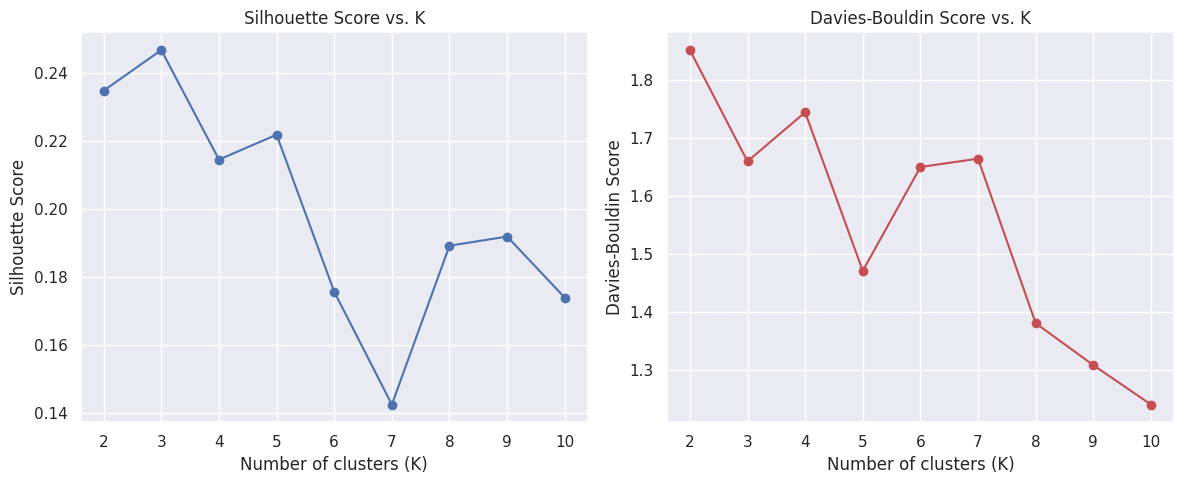

In [23]:
detector = MarketRegimeDetector(depth_data, trade_data)

# Calculate features
detector.calculate_basic_features()
detector.calculate_volatility_features()
detector.calculate_volume_features()

# Before Normalizing: Combine features into features_df
detector.features_df = pd.concat([detector.depth_data[['spread', 'imbalance_lvl1', 'microprice', 'cum_bid_qty', 'cum_ask_qty', 'bid_slope', 'ask_slope', 'volatility_10s', 'volatility_30s']],
                                   detector.trade_data[['volume_imbalance', 'cum_volume_10s', 'cum_volume_30s', 'vwap']]], axis=1)



# Normalize features
detector.normalize_features()

# Find optimal number of clusters
silhouette_scores = []
davies_bouldin_scores = []
k_range = range(2, 11)

for k in k_range:
    silhouette, davies_bouldin = detector.apply_clustering(n_clusters=k)
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)

# Plot clustering metrics
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, 'bo-')
plt.title('Silhouette Score vs. K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(k_range, davies_bouldin_scores, 'ro-')
plt.title('Davies-Bouldin Score vs. K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Score')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


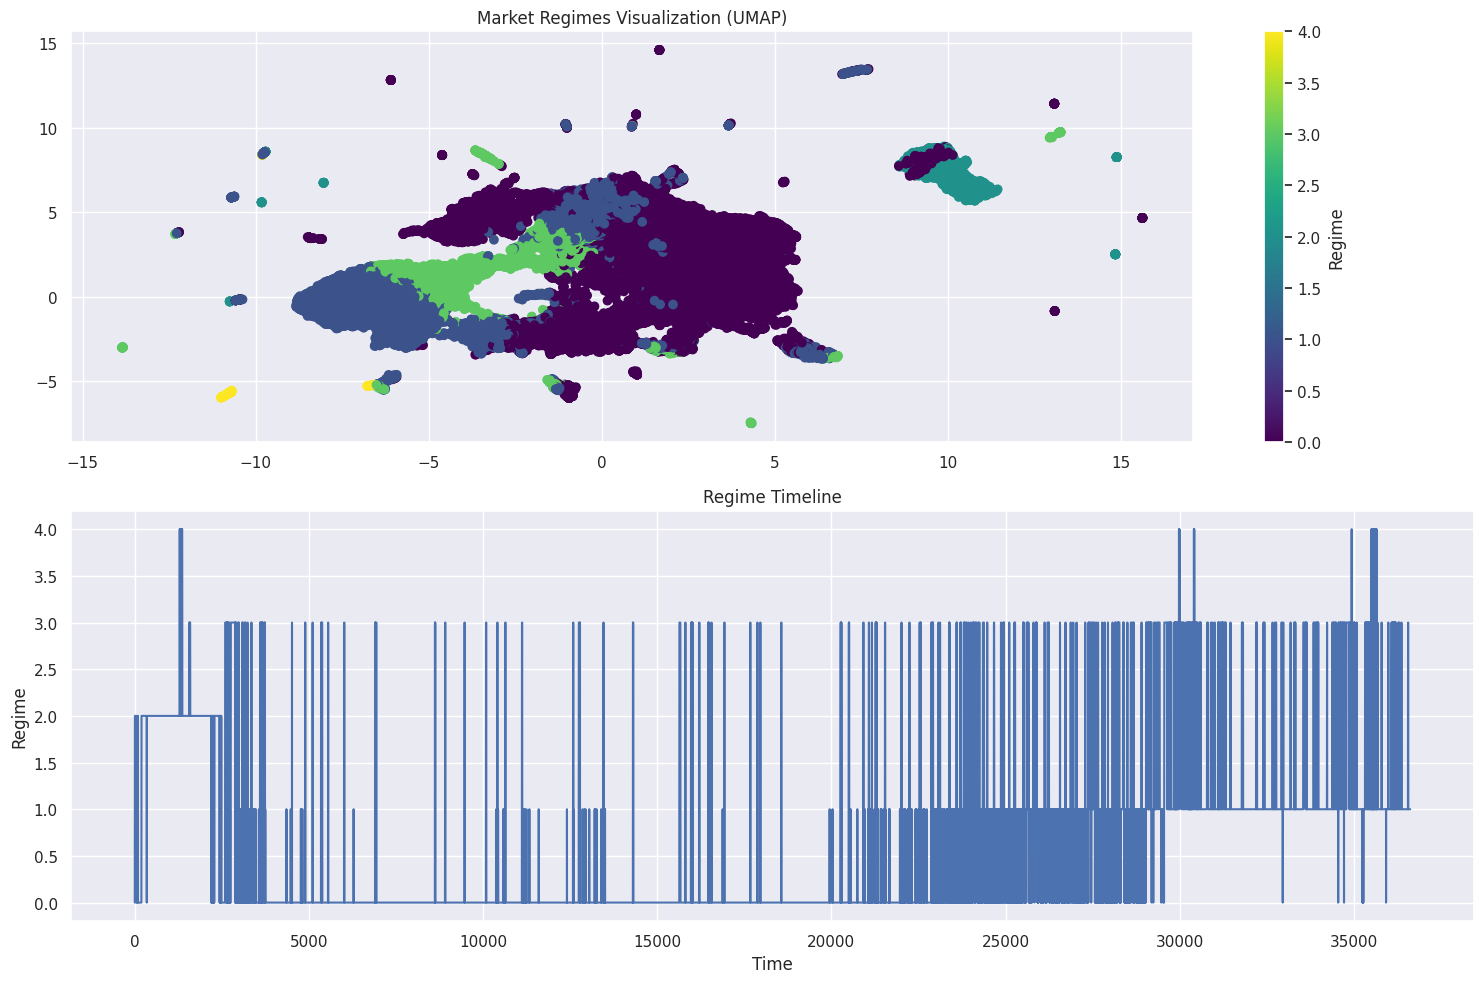

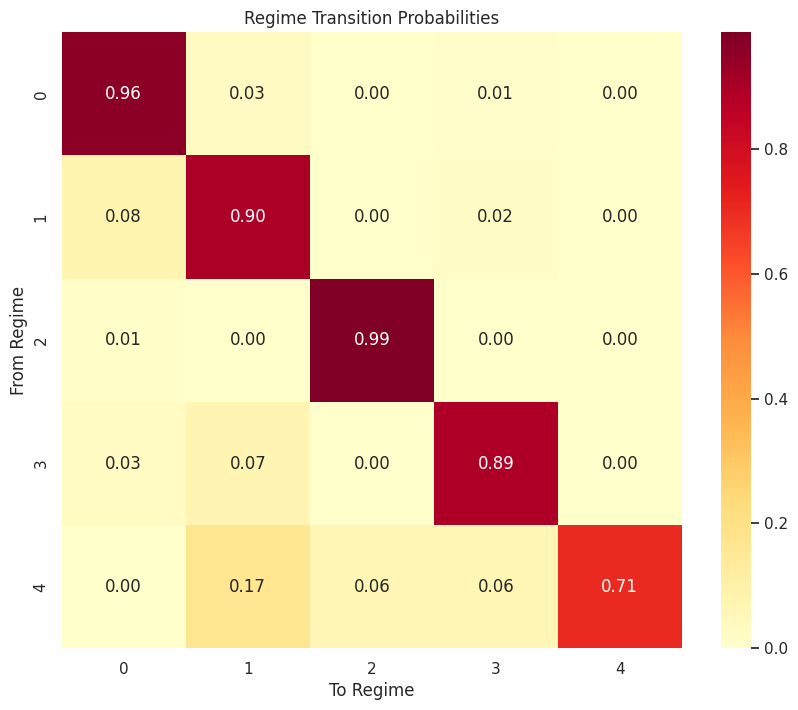

,Regime_0,Regime_1,Regime_2,Regime_3,Regime_4
volatility,0.000071,0.000104,0.000070,0.000196,0.000095
spread,0.078034,0.104419,0.069195,0.106816,0.087053
volume,0.966178,0.898427,0.859075,0.860046,0.879874
imbalance,-0.037733,0.017842,-0.027757,-0.028645,-0.101814


In [24]:
# Apply clustering with optimal k
optimal_k = 5  # Choose based on above analysis
detector.apply_clustering(n_clusters=optimal_k)

# Visualize regimes
detector.visualize_regimes()

# Analyze regime transitions
transition_matrix = detector.analyze_regime_transitions()

# Characterize each regime
regime_characteristics = pd.DataFrame()
for i in range(optimal_k):
    regime_mask = detector.labels == i
    characteristics = {
        'volatility': detector.depth_data['volatility_30s'][regime_mask].mean(),
        'spread': detector.depth_data['spread'][regime_mask].mean(),
        'volume': detector.trade_data['Quantity'][regime_mask].mean(),
        'imbalance': detector.depth_data['imbalance_lvl1'][regime_mask].mean()
    }
    regime_characteristics[f'Regime_{i}'] = pd.Series(characteristics)

display(regime_characteristics)

In [25]:
results_df = pd.DataFrame({
    'Time': depth_data['Time'],
    'Regime': detector.labels
})
results_df.to_csv('regime_labels.csv', index=False)

# Save regime characteristics
regime_characteristics.to_csv('regime_characteristics.csv')

# Save transition matrix
pd.DataFrame(transition_matrix).to_csv('regime_transitions.csv')